     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
Nombre de lignes et de colonnes :  (244, 7)
Types des variables : 
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
Nombre de valeurs manquantes par colonne : 
 tota

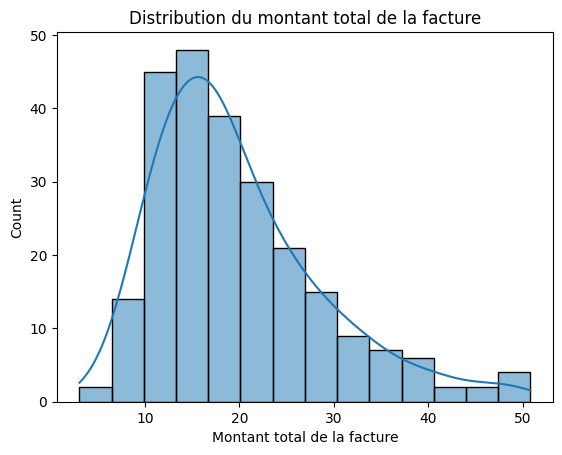

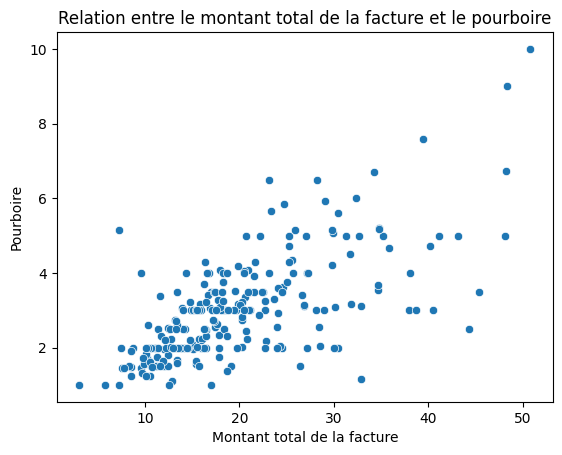

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset Tips
tips = sns.load_dataset('tips')

# Partie 1 : Exploration des données
print(tips)
# Analyse de forme
print("Nombre de lignes et de colonnes : ", tips.shape)
print("Types des variables : \n", tips.dtypes)
print("Nombre de valeurs manquantes par colonne : \n", tips.isnull().sum())

# Analyse de fond
sns.histplot(tips['total_bill'], kde=True)
plt.title('Distribution du montant total de la facture')
plt.xlabel('Montant total de la facture')
plt.show()

# Relation variable/Target
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Relation entre le montant total de la facture et le pourboire')
plt.xlabel('Montant total de la facture')
plt.ylabel('Pourboire')
plt.show()



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Partie 2 : Prétraitement des données

# Supprimer les lignes avec des valeurs manquantes
tips = tips.dropna()

# Encoder les variables catégorielles (jour, moment de la journée, sexe, fumeur)
tips_encoded = pd.get_dummies(tips, columns=['day', 'time', 'sex', 'smoker'], drop_first=True)

# Séparer les variables indépendantes (X) et la variable dépendante (y)
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

# Standardiser les variables numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser le dataset en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Créer un premier modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les résultats obtenus
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error : ", mse)
print("R-squared : ", r2)


Mean Squared Error :  0.7033566017436078
R-squared :  0.43730181943482704
